# EXPLORATORY DATA ANALYSIS. Erste Bodenzustandserhebung Landwirtschaft – Kerndatensatz. 

# NOTEBOOK 1

In this notebook, we are going to study the frequencies of the types of soils we have in each kind of land use:

Land use at time of sampling (A=cropland, G=grassland since at least 5 years, SO=special permanent crops)
Main soil type (German soil classification) following KA5 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ruta_site = ("../../data/raw/openagrar_derivate_00028499/BZE_LW English Version/SITE.xlsx")
df = pd.read_excel(ruta_site)
df

,PointID,County,Sampling_month,Sampling_year,xcoord,ycoord,Soil_climate_zone,Land use,BZE_peat,Main soil type,...,Groundwater level,Thickness of fen or bog,Thickness of peat,Slope,Exposition,Curvature,Type of relief,Position in relief,CS_0_30,CS_30_100
0,2,SH,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,...,>200,0,0,N0,NaN,GG,V,Z,81.89,54.19
1,3,SH,6,2016,480546.9384,6079739.216,Marsch - Nord,G,0,MD,...,135,0,0,N0,NaN,GG,TSF,Z,71.62,59.74
2,4,SH,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,...,105,0,0,N1,NE,GG,TH,Z,65.60,120.40
3,5,SH,10,2015,497355.9905,6079646.589,Marsch - Nord,G,0,RQ,...,180,0,0,N0.2,SS,GG,KSF,K,88.82,220.87
4,6,SH,10,2015,505020.3377,6080401.370,Geest - Nord,G,0,YU,...,140,0,0,N0,NaN,GG,TSF,Z,62.97,84.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,6205,RP,3,2012,384409.7401,5456592.806,Mittellagen Rheinland-Pfalz und Saarland,A,0,RZ,...,>200,0,0,N3,NW,XX,H,O,80.52,25.30
3100,6207,RP,2,2012,437827.5634,5454050.546,Rheinebene und Nebentäler,SO,0,YY,...,>200,0,0,N1,SS,XX,KSF,Z,58.43,52.27
3101,6208,RP,10,2011,448236.4426,5454486.160,Rheinebene und Nebentäler,A,0,TC,...,>200,0,0,N0.1,NaN,XX,V,Z,37.83,41.80
3102,6210,RP,11,2011,450265.8395,5448367.068,Rheinebene und Nebentäler,A,0,YK,...,>200,0,0,N1,EE,XV,T,Z,38.99,47.26


We are going to select coordinates (for future QGIS processing) and for descriptive goals Main soil type and Land use

In [3]:
df2 = df[['PointID', 'Land use', 'Main soil type', 'xcoord', 'ycoord']]
df2['Main soil type'].unique()

array(['YE', 'MD', 'MK', 'RQ', 'YU', 'MN', 'PP', 'GG', 'ZZ', 'YK', 'PPe',
       'SS', 'LL', 'BB', 'MC', 'TT', 'KV', 'GGh', 'GH', 'BBh', 'MO', 'KH',
       'LLh', 'KM', 'YY', 'LF', 'LLd', 'RZ', 'LFd', 'PPh', 'GM', 'AB',
       'TC', 'GGe', 'oZ', 'SH', 'GGc', 'BBn', 'GGi', 'GGa', 'AQ', 'KMu',
       'GGw', 'DD', 'BBc', 'AT', 'CF', 'SG', 'RR', 'AZ', 'RN', 'GGg',
       'SSg', 'CFc', 'HN', 'YO', 'SSc'], dtype=object)

In [4]:
# Create a df with absolute frequencies:
df_freq_ab = pd.DataFrame(df2.groupby('Land use')['Main soil type'].value_counts().unstack(fill_value=0))
df_freq_ab

Main soil type,AB,AQ,AT,AZ,BB,BBc,BBh,BBn,CF,CFc,...,SSg,TC,TT,YE,YK,YO,YU,YY,ZZ,oZ
Land use,,,,,,,,,,,,,,,,,,,,,
A,69,3,4,9,523,4,1,1,12,1,...,1,17,69,36,205,0,68,12,55,0
G,47,1,5,2,174,0,1,0,5,0,...,2,0,1,7,86,1,13,2,50,1
SO,0,0,0,0,10,0,0,0,0,0,...,0,2,1,0,2,0,0,13,8,0


In [5]:
df_freq_rel = df_freq_ab.div(df_freq_ab.sum(axis=1), axis=0).mul(100).round(2)

In [6]:
df_freq_rel

Main soil type,AB,AQ,AT,AZ,BB,BBc,BBh,BBn,CF,CFc,...,SSg,TC,TT,YE,YK,YO,YU,YY,ZZ,oZ
Land use,,,,,,,,,,,,,,,,,,,,,
A,3.09,0.13,0.18,0.40,23.41,0.18,0.04,0.04,0.54,0.04,...,0.04,0.76,3.09,1.61,9.18,0.00,3.04,0.54,2.46,0.00
G,5.73,0.12,0.61,0.24,21.22,0.00,0.12,0.00,0.61,0.00,...,0.24,0.00,0.12,0.85,10.49,0.12,1.59,0.24,6.10,0.12
SO,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,2.00,0.00,4.00,0.00,0.00,26.00,16.00,0.00


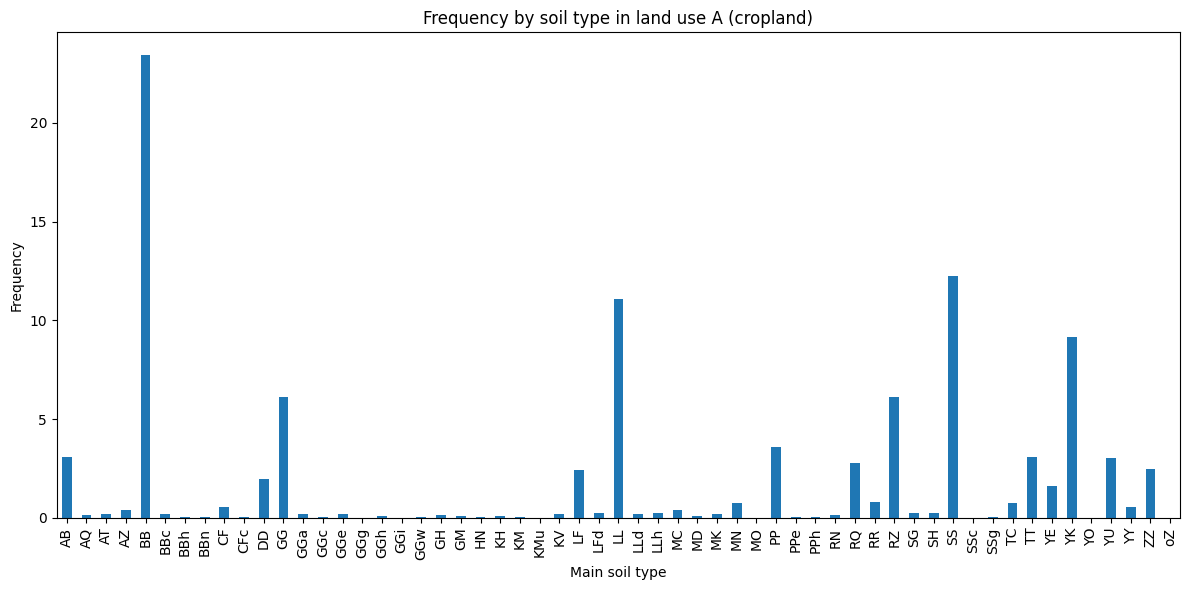

In [7]:
# Histogram relative frequences 
df_freq_rel.loc['A'].plot(kind='bar', figsize=(12,6))
plt.title('Frequency by soil type in land use A (cropland)')
plt.xlabel('Main soil type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
top10_A = df_freq_rel.loc['A'].nlargest(10)
top10_A

Main soil type
BB    23.41
SS    12.22
LL    11.10
YK     9.18
GG     6.13
RZ     6.13
PP     3.58
AB     3.09
TT     3.09
YU     3.04
Name: A, dtype: float64

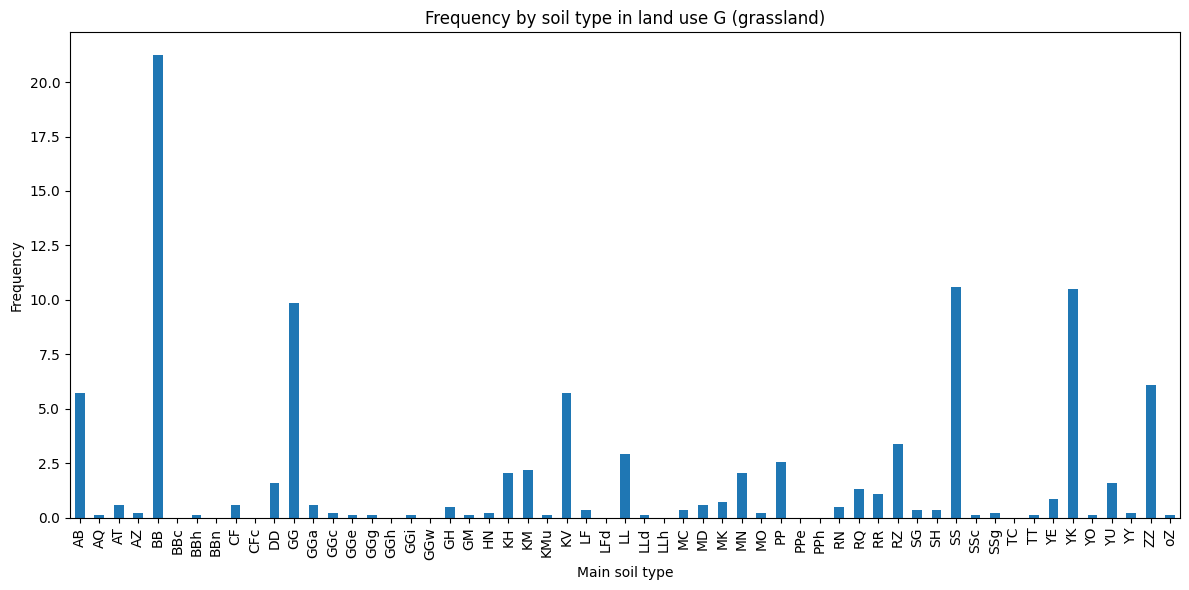

In [9]:
# Histograma relative frequences 
df_freq_rel.loc['G'].plot(kind='bar', figsize=(12,6))
plt.title('Frequency by soil type in land use G (grassland)')
plt.xlabel('Main soil type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
top10_G = df_freq_rel.loc['G'].nlargest(10)
top10_G

Main soil type
BB    21.22
SS    10.61
YK    10.49
GG     9.88
ZZ     6.10
AB     5.73
KV     5.73
RZ     3.41
LL     2.93
PP     2.56
Name: G, dtype: float64

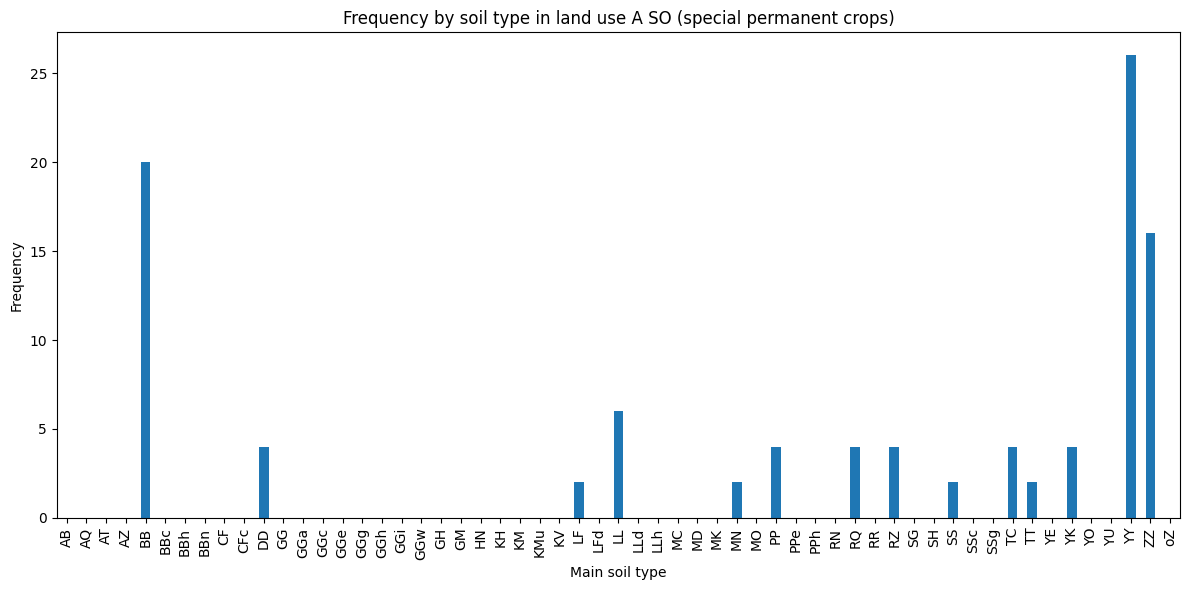

In [11]:
# Histogram relative frequences 
df_freq_rel.loc['SO'].plot(kind='bar', figsize=(12,6))
plt.title('Frequency by soil type in land use A SO (special permanent crops)')
plt.xlabel('Main soil type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
top10_SO = df_freq_rel.loc['SO'].nlargest(10)
top10_SO

Main soil type
YY    26.0
BB    20.0
ZZ    16.0
LL     6.0
DD     4.0
PP     4.0
RQ     4.0
RZ     4.0
TC     4.0
YK     4.0
Name: SO, dtype: float64

In [13]:
ruta_equivalences = ('../../data/processed/KA5_suelos_equivalencias_WRB.csv')
df_equivalences = pd.read_csv(ruta_equivalences)
df_equivalences

,Código_KA5,Descripción_Alemán,Traducción_Español,Equivalente_WRB
0,YE,Ertragsbeeinflusste Böden,Suelos modificados por el hombre (productividad),Anthrosol
1,MD,"Marschboden, degradiert",Suelo de marisma degradado,Stagnosol
2,MK,"Marschboden, kalkhaltig",Suelo de marisma calcáreo,Stagnosol
3,RQ,"Rohboden, Quartär",Suelo inicial en sedimentos cuaternarios,Regosol
4,YU,"Umlandböden, anthropogen verändert",Suelo urbano modificado (antropogénico),Anthrosol
5,MN,"Marschboden, nicht kalkhaltig",Suelo de marisma no calcáreo,Gleysol
6,PP,Podsol,Podsol,Podzol
7,GG,Gleyboden,Suelo hidromórfico por agua subterránea,Gleysol
8,ZZ,Nicht zuordenbar / Sonderfall,No clasificable / categoría especial,NaN
9,YK,Kulturboden,Suelo de cultivo (antropogénico),Anthrosol


Since I have more detailed information about soil types in the WRB system, it is useful for the analysis and interpretation of the results to have the equivalent of each soil type in the WRB classification. To achieve this, we created a function in which the input is the soil type according to the German soil classification system (KA5), and the output includes the description, Spanish translation, and the corresponding equivalent in the WRB classification system.

In [21]:

def WRB_soil(KA5_soil):
    filtro = df_equivalences[df_equivalences['Código_KA5'] == KA5_soil]
    if not filtro.empty:
        return df_equivalences.loc[filtro.index[0]]
    else:
        return None  #

WRB_soil('MN')

Código_KA5                                       MN
Descripción_Alemán    Marschboden, nicht kalkhaltig
Traducción_Español     Suelo de marisma no calcáreo
Equivalente_WRB                             Gleysol
Name: 5, dtype: object

# Results

Croplands
    
    BB    23.41% --> Cambisol
    SS    12.22% --> Stagnosol
    LL    11.10% --> Luvisol
    YK     9.18% --> Antrosol 
    GG     6.13% --> Gleysol
    RZ     6.13% --> Regosol

Grassland

    BB    21.22% --> Cambisol
    SS    10.61% --> Stagnosol
    YK    10.49% --> Antrosol
    GG     9.88% --> Gleysol
    AB     5.73% --> Regosol AC
    KV     5.73% --> Vertisol compacto


Special permanent crops

    YY    26.0% --> Antrosol (Suelo tecnógeno)
    BB    20.0% --> Cambisol
    LL     6.0% --> Luvisol
    DD     4.0% --> Regosol de dunas
    PP     4.0% --> Podzol



# Concluisons

In both grasslands and croplands, Cambisols account for nearly one quarter of the soils. These soils are typically base-saturated and considered fertile. On the other hand, we observe a significantly high presence of waterlogged soils. Stagnosols pose challenges in maintaining productivity, and proper crop management is essential to increase soil organic matter (Telak, L. J. et al., 2021). Therefore, we can compare TOC levels across stagnic soils to identify differences and investigate their possible causes.

Data also show that nearly one third of soils under permanent crops are technogenic soils, likely due to intensive fertilization. We can explore this hypothesis by analyzing TOC and TC values for these soils. This may provide insight into the potential role of such soils as carbon sinks.

This analysis allows us to define the following lines of work using the dataset:

    - Which soil types and under what cropping conditions show higher carbon content.

    - What practices or factors contribute to greater or lesser carbon accumulation.

    - Similarly, we can analyze nitrogen content and calculate the C:N ratio to estimate soil fertility, comparing results by soil type and land use.

(Work in progress. Continuous updates are being made throughout the work period.)



# References

ISRIC. (2022). World Reference Base for Soil Resources: International soil classification system for naming soils and creating legends for soil maps (4th ed., 2022, update 2024-09-24). Food and Agriculture Organization of the United Nations (FAO). https://wrb.isric.org/files/WRB_fourth_edition_2022-12-18_errata_correction_2024-09-24.pdf

Jänsch, S., Steffens, L., Höfer, H., Horak, F., Roß-Nickoll, M., Russell, D., Schallnaß, H.-J., & Römbke, J. (2013). State of knowledge of earthworm communities in German soils as a basis for biological soil quality assessment. Soil Organisms, 85(3), 215–233.

Poeplau, C., Jacobs, A., Don, A., Vos, C., Schneider, F., Wittnebel, M., Heidkamp, A., Prietz, R., Flessa, H. (2020). Stocks of organic carbon in German agricultural soils—Key results of the first comprehensive inventory. Journal of Plant Nutrition and Soil Science, 183(6), 665–681. https://doi.org/10.1002/jpln.202000141

Telak, L. J., Pereira, P., & Bogunovic, I. (2021). Soil degradation mitigation in continental climate in young vineyards planted in Stagnosols. International Agrophysics, 35(4), 417–426. https://doi.org/10.31545/intagr/142663
